# Linear Regression

## Linear Regression using Python implementation for Single Feature

Estimated coefficients:
b_0 = 1.2363636363636363 nb_1 = 1.1696969696969697


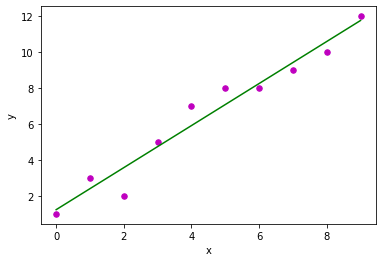

In [1]:
# Simple linear regression is an approach for predicting a response using a single feature.
import numpy as np 
import matplotlib.pyplot as plt 

def estimate_coef(x, y): 
	# number of observations/points 
	n = np.size(x) 

	# mean of x and y vector 
	m_x, m_y = np.mean(x), np.mean(y) 

	# calculating cross-deviation and deviation about x 
	SS_xy = np.sum(y*x) - n*m_y*m_x 
	SS_xx = np.sum(x*x) - n*m_x*m_x 

	# calculating regression coefficients 
	b_1 = SS_xy / SS_xx 
	b_0 = m_y - b_1*m_x 

	return(b_0, b_1) 

def plot_regression_line(x, y, b): 
	# plotting the actual points as scatter plot 
	plt.scatter(x, y, color = "m", 
			marker = "o", s = 30) 

	# predicted response vector 
	y_pred = b[0] + b[1]*x 

	# plotting the regression line 
	plt.plot(x, y_pred, color = "g") 

	# putting labels 
	plt.xlabel('x') 
	plt.ylabel('y') 

	# function to show plot 
	plt.show() 

def main(): 
	# observations 
	x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
	y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 

	# estimating coefficients 
	b = estimate_coef(x, y) 
	print("Estimated coefficients:\nb_0 = {} nb_1 = {}".format(b[0], b[1])) 

	# plotting regression line 
	plot_regression_line(x, y, b) 

if __name__ == "__main__": 
	main() 

## Linear Regression using sklearn for Single Feature

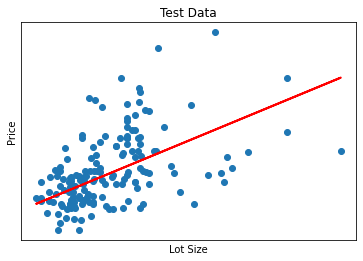

X=[5000], Predicted=[66266.01524043]


In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Load CSV and columns
df = pd.read_csv("Housing.csv")

X = df['lotsize']
X = X.values.reshape(len(X), 1)

y = df['price']
y = y.values.reshape(len(y), 1)

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# setting plot style 
# plt.style.use('default')

# Plot outputs
plt.scatter(X_test, y_test)
plt.title("Test Data")
plt.xlabel("Lot Size")
plt.ylabel("Price")
plt.xticks(())
plt.yticks(())

# Create linear regression
regr = linear_model.LinearRegression()

# Train the model using the training data set
regr.fit(X_train, y_train)

# Plot regression outputs
plt.plot(X_test, regr.predict(X_test), color='r', linewidth=2)

# Show graph
plt.show()

# Single prediction
Xnew = [[5000]]
ynew = regr.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

## Taking selected features

In [3]:
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Load CSV and columns
df = pd.read_csv("Housing.csv")

X = df[['lotsize', 'bedrooms', 'bathrms']]
X = X.values.reshape(len(X), 3)

y = df['price']
y = y.values.reshape(len(y), 1)

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create linear regression
regr = linear_model.LinearRegression()

# Train the model using the training data set
regr.fit(X_train, y_train)

# Single prediction
Xnew = [[5000, 2, 1]]
ynew = regr.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[5000, 2, 1], Predicted=[55563.76884531]


## Multiple linear regression

In [4]:
import pandas as pd 
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Load CSV and columns
dataset = pd.read_csv("Housing.csv")
data = dataset.iloc[:, :]
data.replace(('yes', 'no'), (1, 0), inplace=True)

X = data.iloc[:, 2:].values 
y = dataset.iloc[:, 1].values

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create linear regression
regr = linear_model.LinearRegression()

# Train the model using the training data set
regr.fit(X_train, y_train)

# prediction
Xnew = [[5000, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0]]
ynew = regr.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[5000, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0], Predicted=54779.0361318098


Shape of input Boston data and getting feature_names:
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

Converting data from nd-array to dataframe and adding feature names to the data
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.

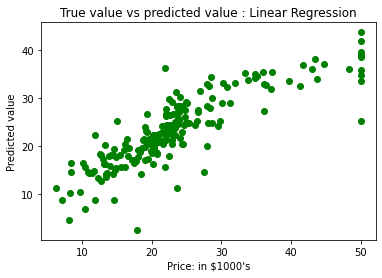


Mean Square Error :  25.20577470236647


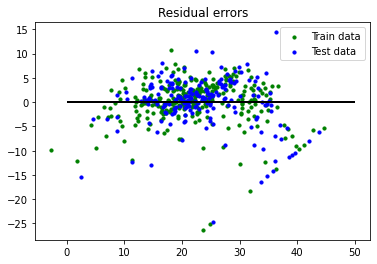

In [5]:
# Boston Housing Kaggle Challenge with Linear Regression
# Ref: https://www.geeksforgeeks.org/ml-boston-housing-kaggle-challenge-with-linear-regression/

import pandas as pd 
import matplotlib.pyplot as plt 

# load the boston dataset 
from sklearn.datasets import load_boston 
boston = load_boston(return_X_y=False) 


# Shape of input Boston data and getting feature_names
print('Shape of input Boston data and getting feature_names:')
print(boston.data.shape)
print(boston.feature_names)

# Converting data from nd-array to dataframe and adding feature names to the data
data = pd.DataFrame(boston.data) 
data.columns = boston.feature_names 
print('\nConverting data from nd-array to dataframe and adding feature names to the data')
print(data.head(10))

# Adding 'Price' (target) column to the data  
print('\nShape of target Boston data')
print(boston.target.shape)

data['Price'] = boston.target 
print('\nAdding \'Price\' (target) column to the data')
print(data.head())

# Description of Boston dataset
print('\nDescription of Boston dataset')
print(data.describe()) 

# Info of Boston Dataset
print('\nInfo of Boston Dataset')
print(data.info()) 

# defining feature matrix(X) and response vector(y) 
X = boston.data 
y = boston.target 

# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 

print('\nSplitting data to training and testing dataset')
print("X_train shape : ", X_train.shape) 
print("X_test shape  : ", X_test.shape) 
print("y_train shape : ", y_train.shape) 
print("y_test shape  : ", y_test.shape) 

# create linear regression object 
from sklearn.linear_model import LinearRegression 
reg = LinearRegression() 

# Fitting Multi Linear regression model to training model 
# train the model using the training sets 
reg.fit(X_train, y_train) 

# predicting the test set results 
y_pred_test = reg.predict(X_test) 
y_pred_train = reg.predict(X_train) 

# regression coefficients 
print('\nCoefficients: \n', reg.coef_) 

# variance score: 1 means perfect prediction 
print('\nVariance score: {}'.format(reg.score(X_test, y_test))) 


# Plotting Scatter graph to show the prediction
plt.scatter(y_test, y_pred_test, c = 'green') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show()

# Results of Linear Regression i.e. Mean Squred Error.
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test, y_pred_test) 
print("\nMean Square Error : ", mse)

# plot for residual error 
## setting plot style 
# plt.style.use('fivethirtyeight') 
## plotting residual errors in training data 
plt.scatter(y_pred_train, y_pred_train - y_train, color = "green", s = 10, label = 'Train data') 
## plotting residual errors in test data 
plt.scatter(y_pred_test, y_pred_test - y_test, color = "blue", s = 10, label = 'Test data') 
## plotting line for zero residual error 
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2) 
## plotting legend 
plt.legend(loc = 'upper right') 
## plot title 
plt.title("Residual errors") 
## function to show plot 
plt.show() 

## Implementation of Polynomial Regression

Data
   sno  Temperature  Pressure
0    1            0    0.0002
1    2           20    0.0012
2    3           40    0.0060
3    4           60    0.0300
4    5           80    0.0900
5    6          100    0.2700


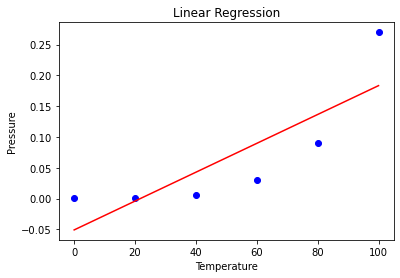

X=[70.0], Predicted=0.11307333333333336


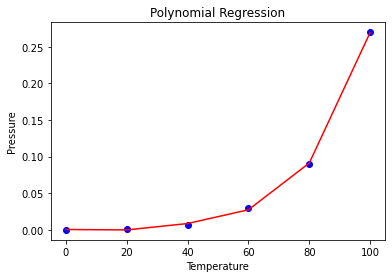

X=[70.0], Predicted=0.05017265624932479


In [6]:
# Ref: https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/

# Importing the libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
  
# Importing the dataset 
datas = pd.read_csv('data.csv') 
print('Data')
print(datas)

X = datas.iloc[:, 1:2].values 
y = datas.iloc[:, 2].values 

# Fitting Linear Regression to the dataset 
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 
lin.fit(X, y) 

# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 
plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
plt.show()

# Predicting a new result with Linear Regression 
Xnew = [[70.0]]
ynew = lin.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
# poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
plt.plot(X, lin2.predict(X_poly), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
plt.show()

# Predicting a new result with Polynomial Regression 
Xnew = [[70.0]]
ynew = lin2.predict(poly.fit_transform(Xnew))
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

## Polynomial Regression for Non-Linear Data – ML

Linear model:
Slope of the line is [[19.9370476]]
Intercept value is [61.74707277]


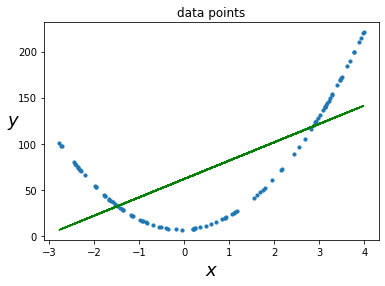

MSE of Linear model 2041.384060970028
R2 score of Linear model:  0.47706845301772205

Polynomial model:
Coefficients of x are [[ 2. 13.]]
Intercept is [7.]


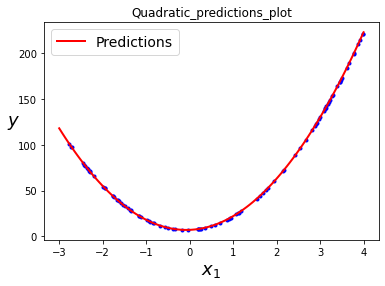

MSE of Polyregression model 5.889398860108508e-28
R2 score of Linear model:  1.0


In [7]:
# Ref: https://www.geeksforgeeks.org/polynomial-regression-for-non-linear-data-ml/?ref=rp

# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score 

# Importing the dataset 
## x = data, y = quadratic equation 
x = np.array(7 * np.random.rand(100, 1) - 3) 
x1 = x.reshape(-1, 1) 
y = 13 * x*x + 2 * x + 7

# First try to fit the data with a linear model.
# Model initialization 
regression_model = LinearRegression() 
# Fit the data(train the model) 
regression_model.fit(x1, y) 
print('Linear model:')
print('Slope of the line is', regression_model.coef_) 
print('Intercept value is', regression_model.intercept_) 
# Predict 
y_predicted = regression_model.predict(x1) 

# data points 
plt.scatter(x, y, s = 10) 
plt.xlabel("$x$", fontsize = 18) 
plt.ylabel("$y$", rotation = 0, fontsize = 18) 
plt.title("data points") 

# predicted values 
plt.plot(x, y_predicted, color ='g')
plt.show()

# model evaluation 
# Calculate the performance of the model in terms of mean square error, root mean square error and r2 score.
mse = mean_squared_error(y, y_predicted) 
rmse = np.sqrt(mean_squared_error(y, y_predicted)) 
r2 = r2_score(y, y_predicted) 

# printing values 
print('MSE of Linear model', mse) 
print('R2 score of Linear model: ', r2) 


# Try Polynomial Regression with degree 2
poly_features = PolynomialFeatures(degree = 2, include_bias = False) 
x_poly = poly_features.fit_transform(x1) 

lin_reg = LinearRegression() 
lin_reg.fit(x_poly, y)
print()
print('Polynomial model:')
print('Coefficients of x are', lin_reg.coef_) 
print('Intercept is', lin_reg.intercept_) 

# Plot the quadratic equation obtained
x_new = np.linspace(-3, 4, 100).reshape(100, 1) 
x_new_poly = poly_features.transform(x_new) 
y_new = lin_reg.predict(x_new_poly) 
plt.plot(x, y, "b.") 
plt.plot(x_new, y_new, "r-", linewidth = 2, label ="Predictions") 
plt.xlabel("$x_1$", fontsize = 18) 
plt.ylabel("$y$", rotation = 0, fontsize = 18) 
plt.legend(loc ="upper left", fontsize = 14) 

plt.title("Quadratic_predictions_plot") 
plt.show() 

# Calculate the performance of the model obtained by Polynomial Regression
y_deg2 = lin_reg.predict(x_poly) 
# model evaluation 
mse_deg2 = mean_squared_error(y, y_deg2) 
r2_deg2 = r2_score(y, y_deg2) 

# printing values 
print('MSE of Polyregression model', mse_deg2) 
print('R2 score of Linear model: ', r2_deg2) 

## Make random regression model

In [8]:
# example of training a final regression model
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=4, noise=0.1, random_state=1)

# fit final model
model = LinearRegression()
model.fit(X, y)
# new instances where we do not know the answer
Xnew, _ = make_regression(n_samples=3, n_features=4, noise=0.1, random_state=1)
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[-1.07296862 -0.52817175  1.62434536 -0.61175641], Predicted=-25.599427097167258
X=[-2.06014071  1.46210794  0.3190391  -0.24937038], Predicted=39.17353369167847
X=[-0.7612069   1.74481176  0.86540763 -2.3015387 ], Predicted=-98.17348039596953
